<a href="https://colab.research.google.com/github/Solstice302/CodSoft_Tasks/blob/main/CodSoft_Task4_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


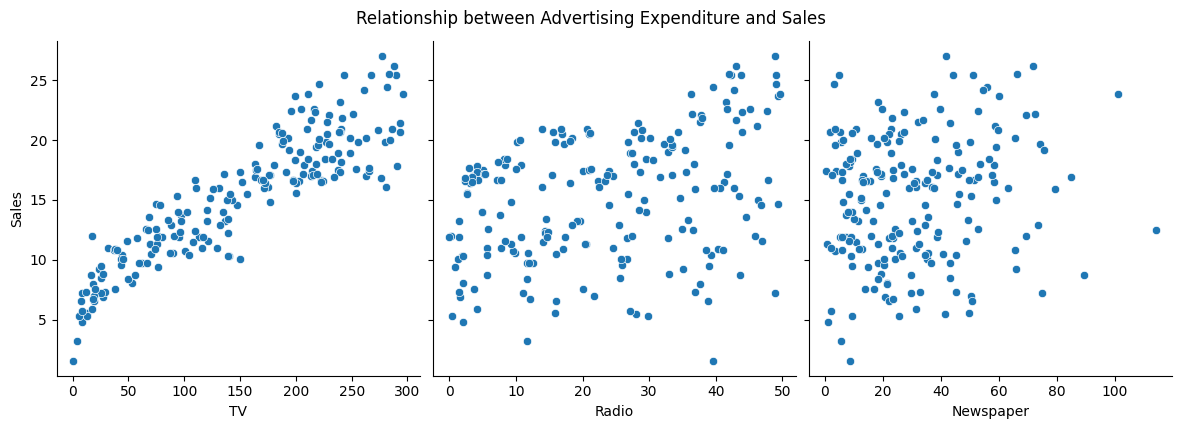

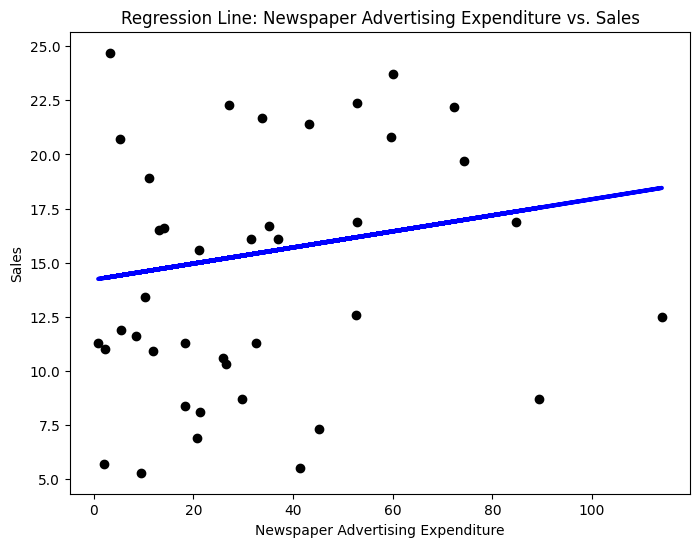

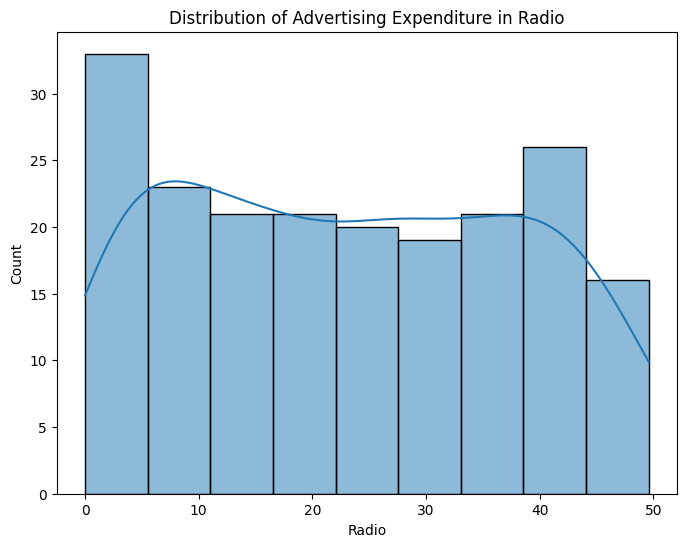

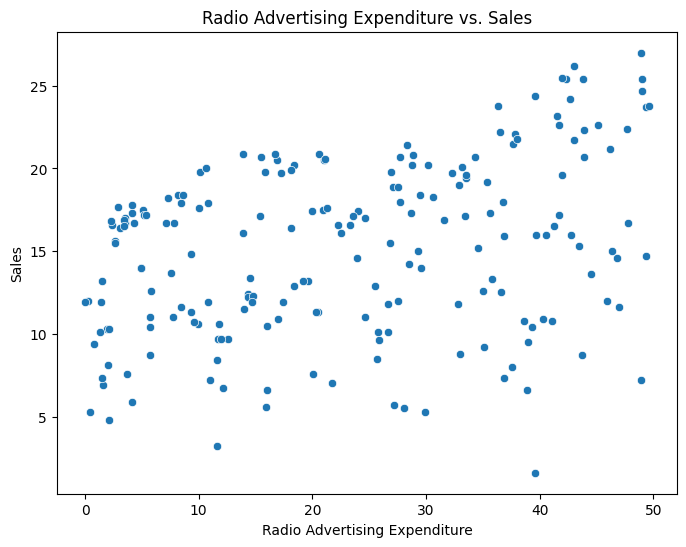

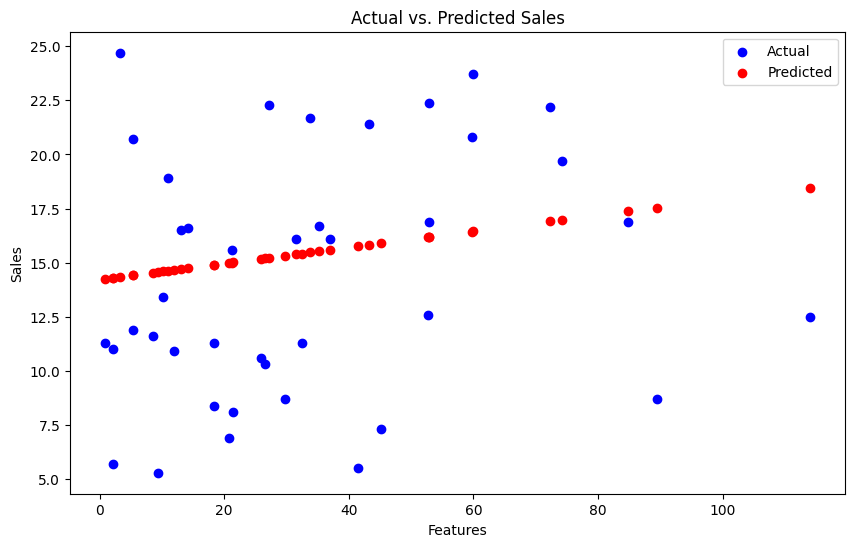

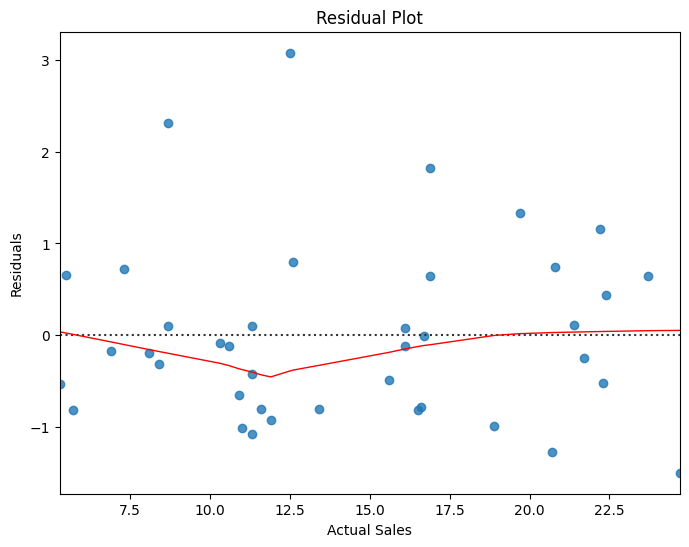

     Newspaper
0         69.2
1         45.1
2         69.3
3         58.5
4         58.4
..         ...
195       13.8
196        8.1
197        6.4
198       66.2
199        8.7

[200 rows x 1 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64
[16.18393979 16.18393979 15.82334825 15.89769702 14.33637283 16.17650491
 15.22855808 14.90142349 14.70439924 15.38840794 14.29919844 15.32149404
 17.36980268 14.56685402 15.20625345 15.52595316 15.75643435 14.74529107
 15.42558232 14.62633303 16.9757542  18.45529474 14.65978998 16.90512286
 14.25087174 15.01294664 15.47390902 14.59659352 15.18023138 14.295481
 15.00551176 14.89770605 16.44787792 17.54080486 15.59286706 14.41443903
 14.53339707 16.43672561 14.41815647 14.98692457]


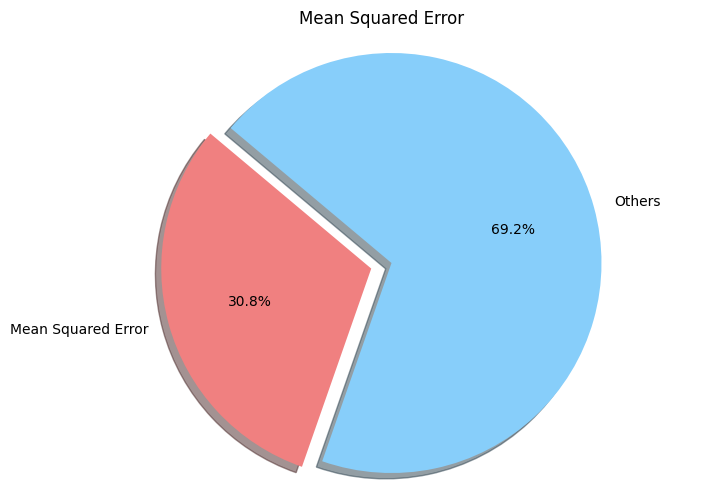

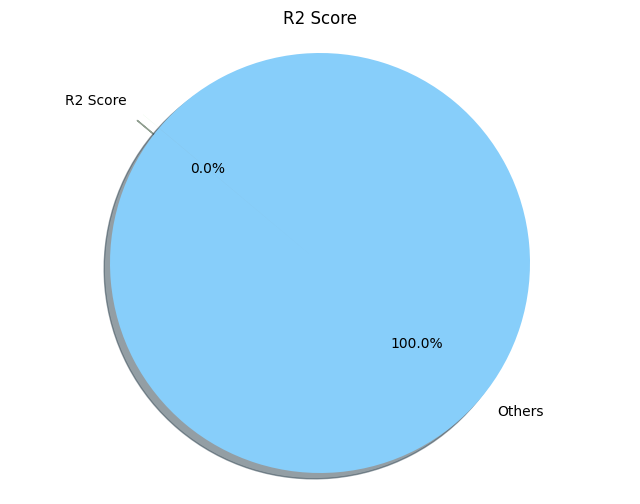

Mean Squared Error: 30.759376922769615
R2 Score: 0.004586344085821592


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Placeholder for loading and preprocessing your dataset
df = pd.read_csv("/content/advertising (1).csv")
# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Describe the dataset to get statistical summaries of the numerical columns
print(df.describe())

# Check for any missing values
print(df.isna().sum())

#Pair Plot
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4)
plt.suptitle('Relationship between Advertising Expenditure and Sales', y=1.05)
plt.show()

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Regression Line: Newspaper Advertising Expenditure vs. Sales')
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

#HistPlot
plt.figure(figsize=(8, 6))
sns.histplot(df['Radio'], kde=True)
plt.title('Distribution of Advertising Expenditure in Radio')
plt.show()

#Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Radio Advertising Expenditure vs. Sales')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.show()

# Assuming X contains multiple features
# Plotting actual vs. predicted values for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Features')
plt.ylabel('Sales')
plt.legend()
plt.show()

#Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.show()

# Splitting dataset into features and target variable
X = df[['Newspaper']]  # Assuming using only 1 feature for simplicity
y = df['Sales']
print(X)
print(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)
print(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Pie chart for Mean Squared Error
plt.figure(figsize=(8, 6))
labels = ['Mean Squared Error', 'Others']
sizes = [mse, 100 - mse]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Mean Squared Error')
plt.axis('equal')
plt.show()

# Pie chart for R2 Score
plt.figure(figsize=(8, 6))
labels = ['R2 Score', 'Others']
sizes = [r2, 100 - r2]
colors = ['lightgreen', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('R2 Score')
plt.axis('equal')
plt.show()

# Evaluate the model
print("\033[1mMean Squared Error:\033[0m", mean_squared_error(y_test, y_pred))
print("\033[1mR2 Score:\033[0m", r2_score(y_test, y_pred))